In [ ]:
#ZEPTO 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [5]:

df = pd.read_csv('zepto_logistics_dataset.csv')

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                3732 non-null   object 
 1   name                    3732 non-null   object 
 2   mrp                     3732 non-null   int64  
 3   discountPercent         3732 non-null   int64  
 4   availableQuantity       3732 non-null   int64  
 5   discountedSellingPrice  3732 non-null   int64  
 6   weightInGms             3732 non-null   int64  
 7   outOfStock              3732 non-null   bool   
 8   quantity                3732 non-null   int64  
 9   Delivery_Zone           3732 non-null   object 
 10  Distance_km             3732 non-null   float64
 11  Partner_Type            3732 non-null   object 
 12  Fuel_Cost               3732 non-null   float64
 13  Partner_Payout          3732 non-null   float64
 14  Delivery_Time_min       3732 non-null   

,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,quantity,Distance_km,Fuel_Cost,Partner_Payout,Delivery_Time_min
count,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000
mean,15680.117899,7.617095,4.008574,14192.834941,387.843783,213.270900,3.725153,1.549317,19.268899,23.551902
std,16088.807618,9.211733,2.203511,13850.726265,678.096509,194.730976,1.871914,2.487414,9.598270,15.076243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,6.020000,1.600000
25%,6000.000000,0.000000,2.000000,5500.000000,100.000000,50.000000,2.120000,0.000000,12.312500,11.400000
50%,11000.000000,6.000000,5.000000,10400.000000,225.000000,186.000000,3.750000,0.000000,16.950000,20.700000
75%,20000.000000,10.000000,6.000000,18400.000000,450.000000,340.000000,5.330000,2.770000,24.050000,32.500000
max,260000.000000,51.000000,6.000000,139900.000000,10000.000000,1500.000000,7.000000,8.400000,45.000000,69.600000


In [8]:
df.isnull().sum()

Category                  0
name                      0
mrp                       0
discountPercent           0
availableQuantity         0
discountedSellingPrice    0
weightInGms               0
outOfStock                0
quantity                  0
Delivery_Zone             0
Distance_km               0
Partner_Type              0
Fuel_Cost                 0
Partner_Payout            0
Delivery_Time_min         0
dtype: int64

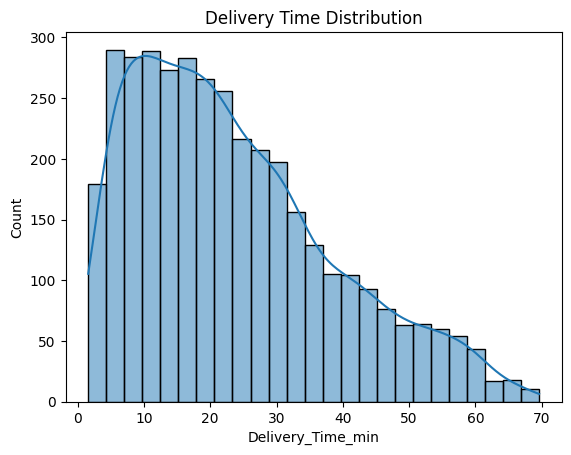

In [12]:

#EDA (EXPLANATORY DATA ANALYSIS )

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Delivery_Time_min'], kde=True)
plt.title('Delivery Time Distribution')
plt.show()

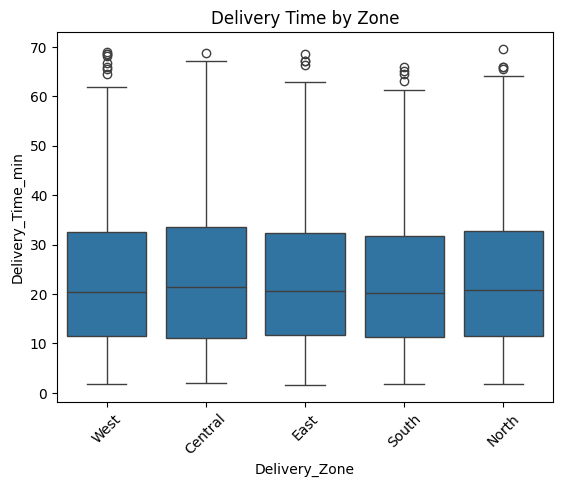

In [13]:
sns.boxplot(x='Delivery_Zone', y='Delivery_Time_min', data=df)
plt.title('Delivery Time by Zone')
plt.xticks(rotation=45)
plt.show()

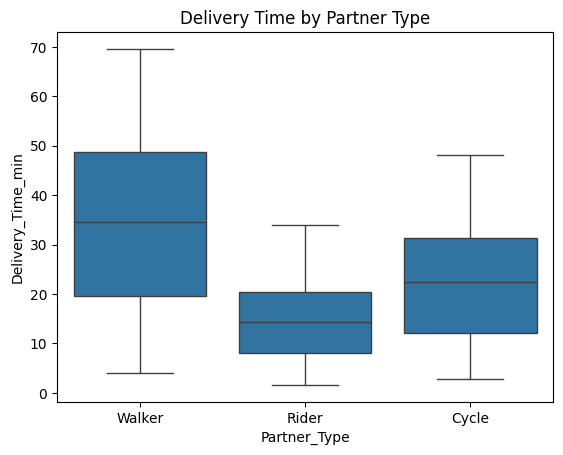

In [16]:
#identify the outliners 
sns.boxplot(x='Partner_Type', y='Delivery_Time_min', data=df)
plt.title('Delivery Time by Partner Type')
plt.show()

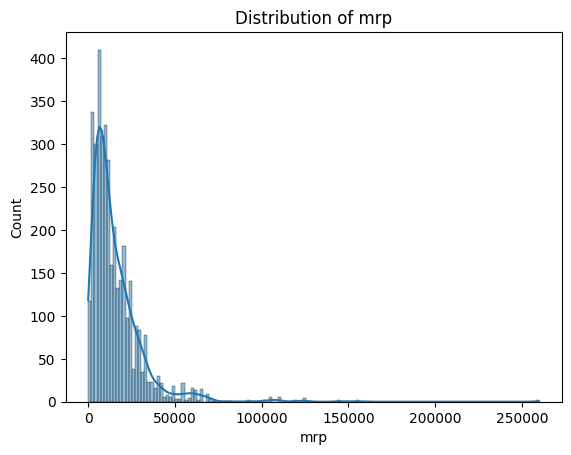

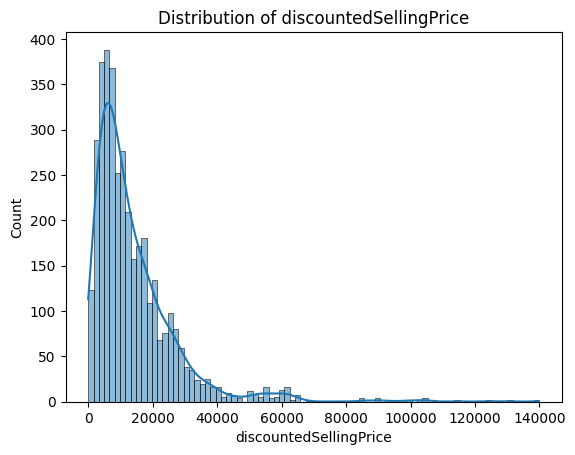

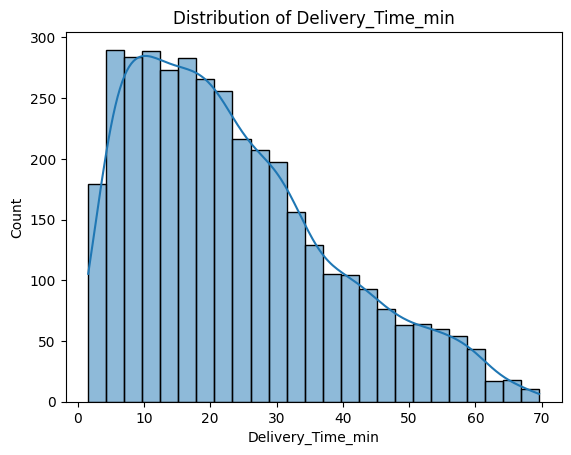

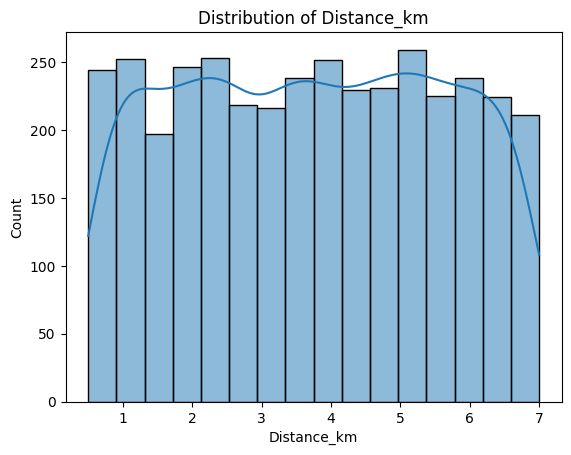

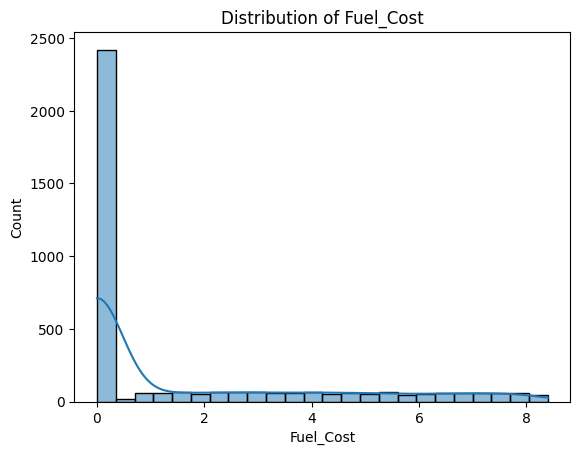

In [17]:
# Feature Distributions
numeric_cols = ['mrp', 'discountedSellingPrice', 'Delivery_Time_min', 'Distance_km', 'Fuel_Cost']
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    

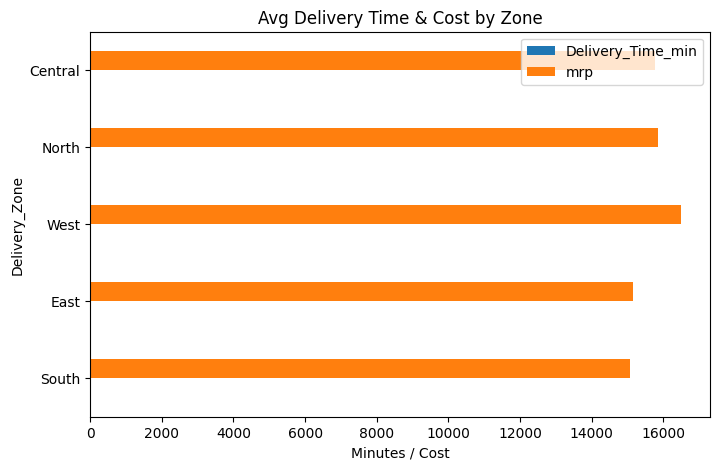

In [19]:
#Zone-wise Delivery Time & Cost
zone_summary = df.groupby('Delivery_Zone')[['Delivery_Time_min', 'mrp']].mean().sort_values('Delivery_Time_min')
zone_summary.plot(kind='barh', figsize=(8, 5), title='Avg Delivery Time & Cost by Zone')
plt.xlabel('Minutes / Cost')
plt.show()


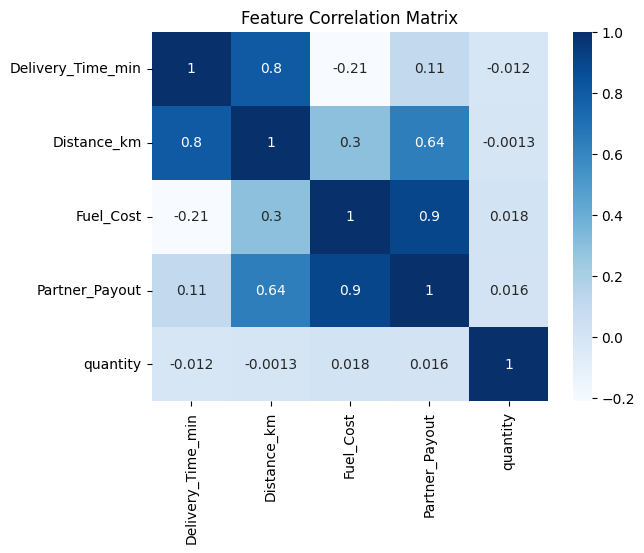

In [20]:
#Correlation Matrix

corr = df[['Delivery_Time_min', 'Distance_km', 'Fuel_Cost', 'Partner_Payout', 'quantity']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Feature Correlation Matrix")
plt.show()


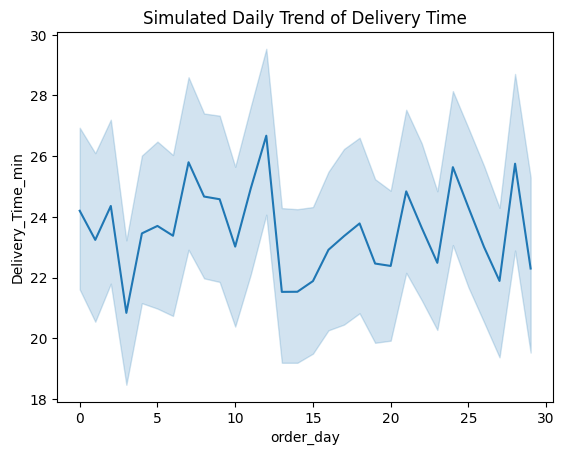

In [21]:
#Simulated Time Trend
df['order_day'] = pd.Series(range(1, len(df)+1)) % 30
sns.lineplot(data=df, x='order_day', y='Delivery_Time_min')
plt.title('Simulated Daily Trend of Delivery Time')
plt.show()


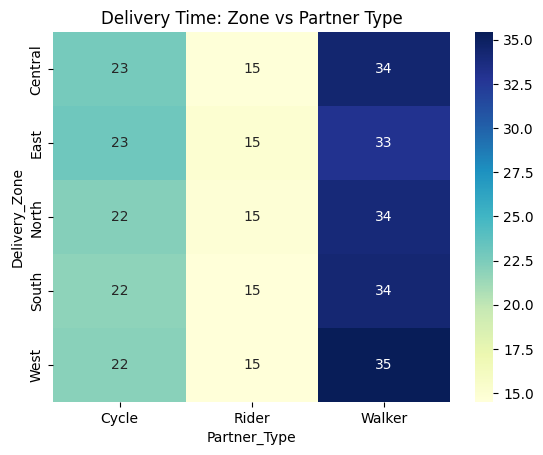

In [24]:
# Derived Features for Insight
df['Cost_per_km'] = df['mrp'] / df['Distance_km']
df['Effective_Discount'] = df['mrp'] - df['discountedSellingPrice']

pivot = df.pivot_table(index='Delivery_Zone', columns='Partner_Type', values='Delivery_Time_min', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Delivery Time: Zone vs Partner Type')
plt.show()


outOfStock
False    14963.650503
True      8613.355408
Name: discountedSellingPrice, dtype: float64


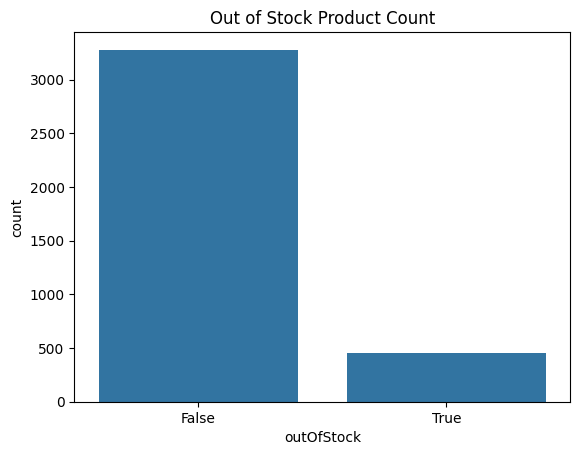

In [25]:
#Inventory Efficiency & Stock Status
stock_summary = df.groupby('outOfStock')['discountedSellingPrice'].mean()
print(stock_summary)

sns.countplot(x='outOfStock', data=df)
plt.title('Out of Stock Product Count')
plt.show()



In [ ]:
#Business EDA

In [28]:
#Which zone has the slowest average delivery time?
df.groupby('Delivery_Zone')['Delivery_Time_min'].mean().sort_values(ascending=False)


Delivery_Zone
Central    23.411458
North      23.230263
West       23.168612
East       22.920280
South      22.732591
Name: Delivery_Time_min, dtype: float64

Text(0.5, 1.0, 'Average Delivery Time by Zone & Partner Type')

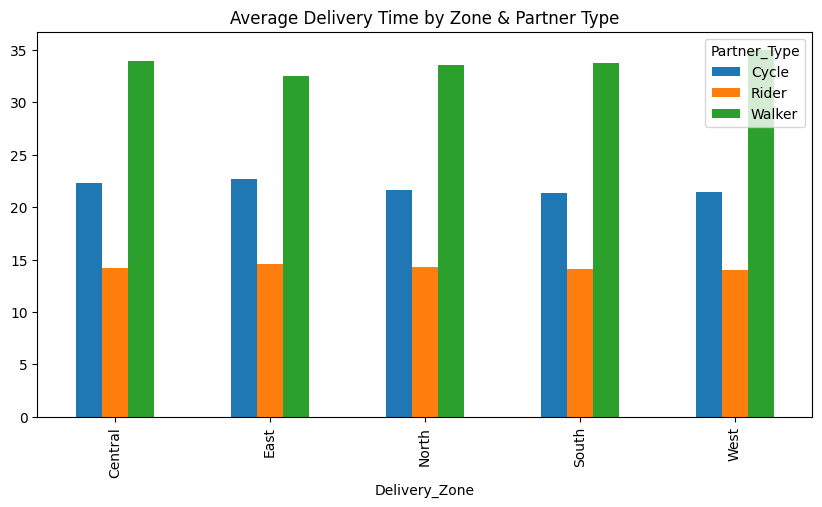

In [31]:
#Are walkers more efficient in specific zones?
zone_partner_time = df.groupby(['Delivery_Zone', 'Partner_Type'])['Delivery_Time_min'].mean().unstack()
zone_partner_time.plot(kind='bar', figsize=(10,5))
plt.title("Average Delivery Time by Zone & Partner Type")


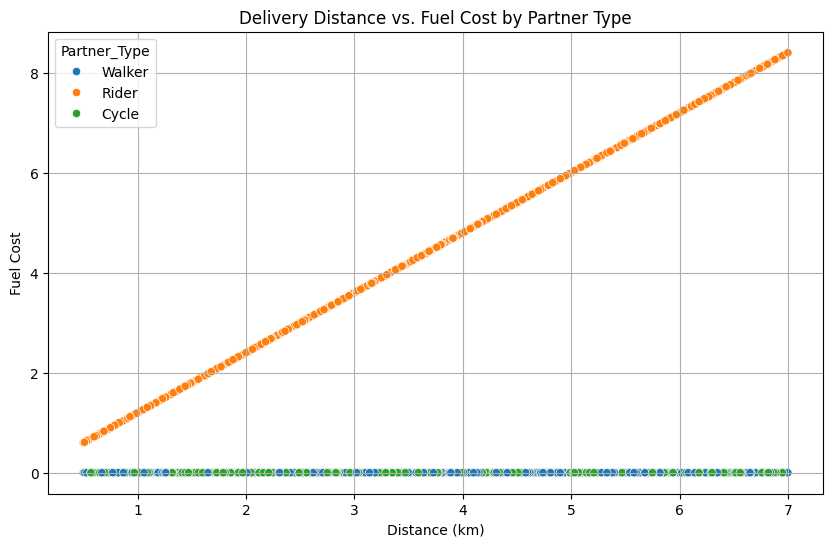


Pearson correlation between Distance_km and Fuel_Cost: 0.2972
There appears to be a weak or no linear relationship between Distance_km and Fuel_Cost.


In [40]:


#Does delivery distance have a linear effect on fuel cost?

# Generate the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance_km', y='Fuel_Cost', hue='Partner_Type', data=df)
plt.title('Delivery Distance vs. Fuel Cost by Partner Type')
plt.xlabel('Distance (km)')
plt.ylabel('Fuel Cost')
plt.grid(True)
plt.show()

# Calculate and print the correlation between Distance_km and Fuel_Cost
correlation = df['Distance_km'].corr(df['Fuel_Cost'])
print(f"\nPearson correlation between Distance_km and Fuel_Cost: {correlation:.4f}")

# Further analysis to assess linearity based on correlation
if correlation > 0.7:
    print("There appears to be a strong positive linear relationship between Distance_km and Fuel_Cost.")
elif correlation < -0.7:
    print("There appears to be a strong negative linear relationship between Distance_km and Fuel_Cost.")
elif 0.3 <= abs(correlation) <= 0.7:
    print("There appears to be a moderate linear relationship between Distance_km and Fuel_Cost.")
else:
    print("There appears to be a weak or no linear relationship between Distance_km and Fuel_Cost.")

In [4]:
import pandas as pd
import os
df = pd.read_csv('zepto_logistics_dataset.csv')



output_path = 'zepto_logistics_cleaned.csv' 

try:
    df.to_csv(output_path, index=False)
    print(f"✅ Cleaned data successfully saved as '{output_path}'")
except OSError as e:
    print(f"❌ Error saving cleaned data: {e}")
    print("This is likely a permission issue preventing file writing. Please ensure your environment allows saving files to the current directory.")
    print("\nHere are the first 5 rows of the cleaned DataFrame:")
    print(df.head())

✅ Cleaned data successfully saved as 'zepto_logistics_cleaned.csv'


In [1]:
import pandas as pd
import numpy as np

try:
    df = pd.read_csv('zepto_logistics_dataset.csv')
    print("Loaded 'zepto_logistics_dataset.csv'")
except FileNotFoundError:
    df = pd.read_csv('zepto_logistics_dataset.csv')
    # Re-perform the cleaning steps if starting from the original file
    cols_to_drop = ['Delivery_Zone.1', 'Distance_km.1', 'Delivery_Time_min.1']
    df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
    print("Loaded 'zepto_logistics_dataset.csv' and cleaned it.")


# --- Generate Synthetic 'order_day' Column ---
# Define a start date
start_date = pd.to_datetime('2023-01-01')

# Define an end date to cover all rows.
# For 3732 rows, let's span a few months to make it realistic.
# Roughly 3732 / (30 days * avg orders per day)
num_days = int(np.ceil(len(df) / 50)) # Assuming avg 50 orders per day for spreading
end_date = start_date + pd.Timedelta(days=num_days)

# Generate a sequence of dates within the range
dates = pd.to_datetime(pd.date_range(start=start_date, end=end_date, periods=len(df)))

# Assign the generated dates to a new 'order_day' column
df['order_day'] = dates

# Sort the DataFrame by 'order_day' to make trends logical (optional but good practice)
df = df.sort_values(by='order_day').reset_index(drop=True)

# Display the first few rows with the new 'order_day' column
print("\nDataFrame with new 'order_day' column (first 5 rows):")
print(df[['order_day', 'Category', 'name', 'Delivery_Zone']].head())

# Display info to confirm the data type of the new column
print("\nDataFrame Info with 'order_day':")
print(df.info())

# Save the DataFrame with the new 'order_day' column
df.to_csv('zepto_master_with_order_day.csv', index=False)
print("\nDataFrame with 'order_day' saved as 'zepto_logistics_datasetby order day.csv'")

Loaded 'zepto_logistics_dataset.csv'

DataFrame with new 'order_day' column (first 5 rows):
                      order_day             Category              name  \
0 2023-01-01 00:00:00.000000000  Fruits & Vegetables             Onion   
1 2023-01-01 00:28:56.799785580  Fruits & Vegetables     Tomato Hybrid   
2 2023-01-01 00:57:53.599571160  Fruits & Vegetables    Tender Coconut   
3 2023-01-01 01:26:50.399356740  Fruits & Vegetables  Coriander Leaves   
4 2023-01-01 01:55:47.199142321  Fruits & Vegetables    Ladies Finger    

  Delivery_Zone  
0          West  
1       Central  
2          East  
3       Central  
4       Central  

DataFrame Info with 'order_day':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Category                3732 non-null   object        
 1   name                    3732 